In [44]:
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import sys
import os
# Add project root to path - adjust the number of parent dirs (..) based on where your notebook is located
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import utils

importlib.reload(utils)
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

<module 'src.utils.utils' from 'c:\\LocalData\\pabflore\\encoder-pacman\\src\\utils\\utils.py'>

# Exploratory Data Analysis of Pacman gathered data (Updated to 2024-12-30)

In [45]:
## Read tables from csv
BANNED_USERS = [42]

user_df = pd.read_csv("../data/user.csv")
ip_df = pd.read_csv("../data/userip.csv")
redcap_df = pd.read_csv("../data/redcapdata.csv")
game_df = pd.read_csv(
    "../data/game.csv", converters={"date_played": lambda x: pd.to_datetime(x)}
)
game_df = game_df[~game_df["user_id"].isin(BANNED_USERS)]  # Remove user 42 (myself)
# game_df = game_df[game_df['user_id'] != 47]
gamestate_df = pd.read_csv(
    "../data/gamestate.csv", converters={"user_id": lambda x: int(x)}
)
gamestate_df = gamestate_df[
    ~gamestate_df["game_id"].isin(
        game_df.loc[game_df["user_id"].isin(BANNED_USERS), "game_id"]
    )
]  # Remove games associated with userid 42 (myself)
psychometrics_df = pd.read_csv("..\data\psych\AiPerCogPacman_DATA_2025-04-01_1343.csv")

In [46]:
## Inspect data

user_df.info()
game_df.info()
gamestate_df.info()


user_df.head()
game_df.head()
gamestate_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   150 non-null    int64 
 1   username  150 non-null    object
 2   password  150 non-null    object
 3   email     150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 4 to 861
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   game_id             855 non-null    int64         
 1   user_id             855 non-null    int64         
 2   session_number      855 non-null    int64         
 3   game_in_session     855 non-null    int64         
 4   total_games_played  855 non-null    int64         
 5   source              855 non-null    object        
 6   date_played         855 non-null    datetime64[ns]
 7   game_dura

,user_id,username,password,email
0,42,Pipa,$2y$10$eaIuKNdOjUqI0pxnZ5nUzu/e2QZS3Dqz2fGL1BO...,2323
1,61,snitch,$2y$10$Q32znpux74Oxo53bntHGZeNo04Y7tUbuXVsX/Ze...,sonja.kilpelainen@helsinki.fi
2,62,bencowley,$2y$10$hZ2z65VxakTGuYjQNVIR0eA9uIs8R4fQhOrATUz...,ben.cowley@helsinki.fi
3,63,Mosh,$2y$10$/1zd0cbvo1otOHkyU56y0.RuxKcc.z0jYBBQ2dr...,satu.sahla@helsinki.fi
4,64,Beñat,$2y$10$qOdTjOy3sdVj8FymDzouA.A2nvjpMfbiqGD5i3i...,betxeber@gmail.com


,game_id,user_id,session_number,game_in_session,total_games_played,source,date_played,game_duration,win,level
4,388,64,1,1,1,DataGathering,2024-11-29 14:13:35,75.874,1,1
5,389,64,1,2,2,DataGathering,2024-11-29 14:14:58,14.981,0,2
6,390,64,1,3,3,DataGathering,2024-11-29 14:15:57,55.516,1,1
7,391,64,1,4,4,DataGathering,2024-11-29 14:17:00,48.834,0,2
8,392,64,1,5,5,DataGathering,2024-11-29 14:18:12,80.657,1,1


,game_state_id,game_id,time_elapsed,score,lives,pacman_attack,input_direction,movement_direction,Pacman_X,Pacman_Y,...,ghost3_state,ghost4_state,powerPellets,pellets,powerpelletstate_1,powerpelletstate_2,powerpelletstate_3,powerpelletstate_4,fruitState_1,fruitState_2
0,214062,382,0.19,0,3,0,NaN,none,0.0,-9.498903,...,0,0,4,244,1,1,1,1,0,0
1,214063,382,0.23,0,3,0,none,none,0.0,-9.498903,...,0,0,4,244,1,1,1,1,0,0
2,214064,382,0.29,0,3,0,none,none,0.0,-9.498903,...,0,0,4,244,1,1,1,1,0,0
3,214065,382,0.33,0,3,0,none,none,0.0,-9.498903,...,0,0,4,244,1,1,1,1,0,0
4,214066,382,0.39,0,3,0,none,none,0.0,-9.498903,...,0,0,4,244,1,1,1,1,0,0


In [47]:
game_df[["game_duration"]].describe()

,game_duration
count,855.000000
mean,58.395628
std,36.623574
min,4.155000
25%,47.114500
50%,59.630000
75%,72.118000
max,933.101000


In [48]:
# Aggregated data per participant
agg = game_df.groupby("user_id").agg(
    {
        "game_duration": "mean",
        "level": "max",
        "game_id": "count",
        "game_in_session": "max",
        "session_number": "max",
        "win": "sum",
    }
)
agg["losses"] = agg["game_id"] - agg["win"]

agg["winrate"] = agg["win"] / agg["game_id"]

agg.rename(
    columns={
        "game_duration": "avg_game_duration",
        "level": "max_level",
        "game_id": "games_played",
        "game_in_session": "longest_session",
        "session_number": "amount_sessions",
        "win": "wins",
    },
    inplace=True,
)

agg.sort_values(by="losses", ascending=False)

agg.describe()

,avg_game_duration,max_level,games_played,longest_session,amount_sessions,wins,losses,winrate
user_id,,,,,,,,
74,62.465310,4,71,23,12,36,35,0.507042
78,56.279762,3,42,17,5,15,27,0.357143
73,58.233405,3,37,37,1,15,22,0.405405
157,63.527032,4,31,25,2,13,18,0.419355
91,51.758030,4,33,33,1,17,16,0.515152
...,...,...,...,...,...,...,...,...
176,68.762333,3,3,3,1,2,1,0.666667
182,57.100200,5,5,5,1,4,1,0.800000
170,69.938000,1,1,1,1,0,1,0.000000


,avg_game_duration,max_level,games_played,longest_session,amount_sessions,wins,losses,winrate
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,60.669812,2.298077,8.221154,6.605769,1.432692,3.519231,4.701923,0.339834
std,22.767471,1.197731,10.076365,6.641175,1.356498,5.409414,5.393055,0.260065
min,37.798000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,53.023583,1.000000,3.000000,3.000000,1.000000,0.000000,2.000000,0.000000
50%,58.248603,2.000000,5.000000,4.000000,1.000000,2.000000,3.000000,0.387500
75%,63.595399,3.000000,10.000000,6.000000,1.000000,4.000000,5.000000,0.500000
max,272.720750,5.000000,71.000000,37.000000,12.000000,36.000000,35.000000,0.800000


In [49]:
agg.loc[agg["games_played"] >= 10].__len__()

27

(array([33., 27., 14.,  6.,  6.,  3.,  6.,  1.,  0.,  0.,  2.,  0.,  2.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 1.        ,  3.33333333,  5.66666667,  8.        , 10.33333333,
        12.66666667, 15.        , 17.33333333, 19.66666667, 22.        ,
        24.33333333, 26.66666667, 29.        , 31.33333333, 33.66666667,
        36.        , 38.33333333, 40.66666667, 43.        , 45.33333333,
        47.66666667, 50.        , 52.33333333, 54.66666667, 57.        ,
        59.33333333, 61.66666667, 64.        , 66.33333333, 68.66666667,
        71.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Number of Games Played')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Games Played per User')

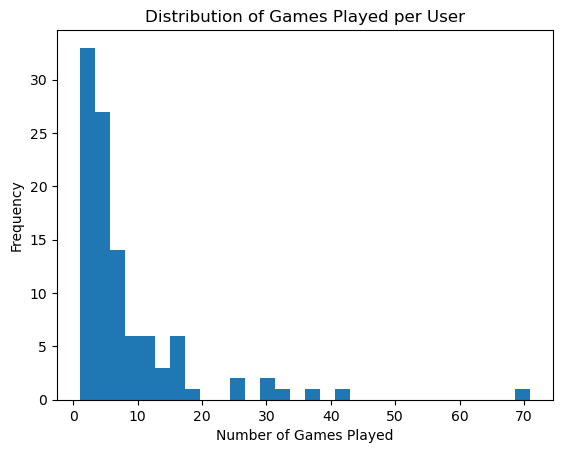

In [50]:
# Descriptive statistic of main variables.

# Distribution of games played per user

user_game_counts = game_df.groupby("user_id").size()
plt.hist(user_game_counts, bins=30)
plt.xlabel("Number of Games Played")
plt.ylabel("Frequency")
plt.title("Distribution of Games Played per User")
plt.show()

In [51]:
game_df.loc[game_df["game_duration"] > 500, "game_id"]

35    419
Name: game_id, dtype: int64

An outlier in game duration was identified. This is game id 419, and it was probably due to a bug (game freeze?).

(array([ 4.,  1.,  0.,  3.,  6.,  6.,  9.,  6.,  6.,  8.,  5.,  4.,  5.,
         5.,  9.,  9.,  5.,  5.,  4.,  4.,  2.,  4.,  4.,  6.,  3., 11.,
         5.,  6.,  4., 15.,  6.,  5.,  9.,  9., 10.,  7., 11., 14.,  9.,
        23., 22., 25., 23., 19., 16., 26., 26., 22., 20., 20., 20., 24.,
        18., 15., 25., 18., 17., 26., 20., 23., 10., 22., 11., 12., 15.,
        12., 11., 12.,  9.,  5.,  4.,  0.,  4.,  5.,  1.,  7.,  4.,  2.,
         1.,  3.,  4.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  4.155  ,   5.33183,   6.50866,   7.68549,   8.86232,  10.03915,
         11.21598,  12.39281,  13.56964,  14.74647,  15.9233 ,  17.10013,
         18.27696,  19.45379,  20.63062,  21.80745,  22.98428,  24.16111,
         25.33794,  26.51477,  27.6916 ,  28.86843,  30.04526,  31.22209,
         32.39892,  33.57575,  34.75258,  35.92941,  37.10624,  38.28307,
         39.4599 ,  40.63673,  41.81356,  42.99039,  44.16722,  

Text(0.5, 0, 'Game Duration')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Game Duration (less than 500)')

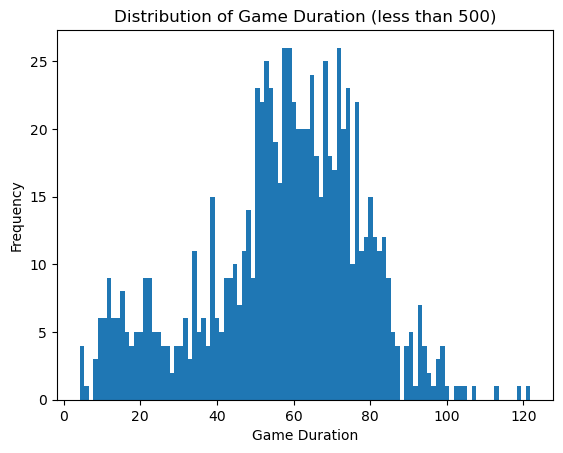

In [52]:
# Distribution of game duration
import matplotlib.pyplot as plt

plt.hist(game_df.loc[game_df["game_duration"] < 500, "game_duration"], bins=100)
plt.xlabel("Game Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Game Duration (less than 500)")
plt.show()

In [53]:
# Distribution of games played per level
game_df.groupby("level").size()

level
1    493
2    244
3     76
4     33
5      9
dtype: int64

In [54]:
random_record_id = psychometrics_df["record_id"].sample(n=1).iloc[0]
psychometrics_df.loc[psychometrics_df["record_id"] == random_record_id]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,redcap_survey_identifier,consent_timestamp,name,email,age,gender,gender_other,...,total_games_flow,fss_1,fss_2,fss_3,fss_4,fss_5,fss_6,fss_7,fss_8,flow_complete
53,57,NaN,NaN,NaN,2024-11-19 17:00:35,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,57,flow,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,3.0,3.0,4.0,1.0,1.0,1.0,6.0,2.0


In [55]:
bisbas_df = psychometrics_df.loc[
    ~psychometrics_df["redcap_repeat_instrument"].isin(["flow", "sam"])
    & psychometrics_df["consent_timestamp"].notna()
    & (psychometrics_df["record_id"] > 60)
]

bisbas_df = bisbas_df.iloc[:, 5:34]

bisbas_df.describe()

,age,gender,gender_other,edu,experience,consent_answer,bis_1,bis_2,bis_3,bis_4,...,rew_4,rew_5,drive_1,drive_2,drive_3,drive_4,fun_1,fun_2,fun_3,fun_4
count,112.000000,112.000000,0.0,112.000000,105.000000,112.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,28.705357,1.758929,NaN,4.241071,1.152381,0.991071,2.900901,3.153153,3.027027,3.279279,...,3.378378,3.117117,2.558559,2.567568,2.495495,1.981982,2.819820,2.900901,3.072072,2.531532
std,7.831144,0.700650,NaN,0.960907,0.361113,0.094491,0.762233,0.776919,0.768227,0.776603,...,0.661322,0.759650,0.794123,0.837980,0.761265,0.738327,0.875922,0.797211,0.709823,0.784159
min,20.000000,1.000000,NaN,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.750000,1.000000,NaN,4.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,2.000000,2.000000,2.000000,1.500000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,2.000000,NaN,4.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,31.000000,2.000000,NaN,5.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000
max,59.000000,4.000000,NaN,6.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Psych and Performance 



In [82]:
from src.datahandlers import PacmanDataReader

data = PacmanDataReader(data_folder="../data/", read_games_only=False)

user_df = data.user_df
game_df = data.game_df
gamestate_df = data.gamestate_df
psychometrics_df = data.psychometrics_df


In [98]:

whole_games = game_df.loc[(game_df["win"] == 0)]

whole_games_scores = gamestate_df.loc[gamestate_df["game_id"].isin(whole_games["game_id"])].groupby("game_id").agg(
    {"score":"max"}
)

whole_games = pd.merge(whole_games, whole_games_scores, how="outer", on="game_id")

whole_games['total_whole_games_played'] = whole_games.groupby('user_id').cumcount() + 1




In [99]:


flow = psychometrics_df.loc[psychometrics_df[
    "redcap_repeat_instrument"] == "flow"].loc[:,
                                               ["record_id", 
                                                "total_games_flow", 
                                                "redcap_repeat_instance",
                                                "fss_1", 
                                                "fss_2", 
                                                "fss_3", 
                                                "fss_4", 
                                                "fss_5", 
                                                "fss_6", 
                                                "fss_7", 
                                                "fss_8"]]


whole_games.loc[:,["user_id", "game_id", "score", "total_games_played"]].__len__()

flow = flow.rename(columns={
    "record_id": "user_id",
    "total_games_flow": "total_games_played"
})

flow["FLOW"] = flow.iloc[:, 2:].sum(axis=1)




488

In [117]:
import numpy as np

perf_psych_df = pd.merge(flow,
    whole_games[["user_id", "total_games_played", "total_whole_games_played", "game_id", "score"]],
    on=["user_id", "total_games_played"],
    how="right"
).dropna()

perf_psych_df["score_log"] = np.log(perf_psych_df["score"])
perf_psych_df["total_whole_games_played_log"] = np.log(perf_psych_df["total_whole_games_played"])

# Get users with more than 8 total whole games
users_with_many_games = perf_psych_df.groupby('user_id')['total_whole_games_played'].max() > 9
users_to_keep = users_with_many_games[users_with_many_games].index
perf_psych_df = perf_psych_df[perf_psych_df['user_id'].isin(users_to_keep)]

# Count unique users after filtering
perf_psych_df.loc[:,"user_id"].unique().__len__()

perf_psych_df

11

,user_id,total_games_played,redcap_repeat_instance,fss_1,fss_2,fss_3,fss_4,fss_5,fss_6,fss_7,fss_8,FLOW,total_whole_games_played,game_id,score,score_log,total_whole_games_played_log
5,69,2.0,1.0,1.0,7.0,7.0,7.0,1.0,1.0,1.0,7.0,33.0,2,399,2650,7.882315,0.693147
6,69,3.0,2.0,5.0,2.0,2.0,3.0,2.0,2.0,3.0,5.0,26.0,3,400,2750,7.919356,1.098612
7,69,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,39.0,4,401,3000,8.006368,1.386294
8,69,5.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,34.0,5,402,2240,7.714231,1.609438
9,69,7.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,61.0,6,404,7470,8.918650,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,201,10.0,7.0,2.0,5.0,5.0,4.0,3.0,2.0,1.0,6.0,35.0,8,1179,5030,8.523175,2.079442
454,201,12.0,8.0,3.0,6.0,6.0,6.0,3.0,2.0,3.0,5.0,42.0,9,1181,5760,8.658693,2.197225
455,201,13.0,9.0,3.0,6.0,6.0,6.0,3.0,2.0,2.0,5.0,42.0,10,1182,2930,7.982758,2.302585
456,201,15.0,10.0,4.0,6.0,6.0,6.0,3.0,2.0,3.0,5.0,45.0,11,1184,6930,8.843615,2.397895


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_whole_games_played', ylabel='score'>

<Axes: xlabel='total_whole_games_played', ylabel='score'>

Text(0.5, 1.0, 'Score vs Total Games Played by User')

Text(0.5, 0, 'Total Games Played')

Text(0, 0.5, 'Score')

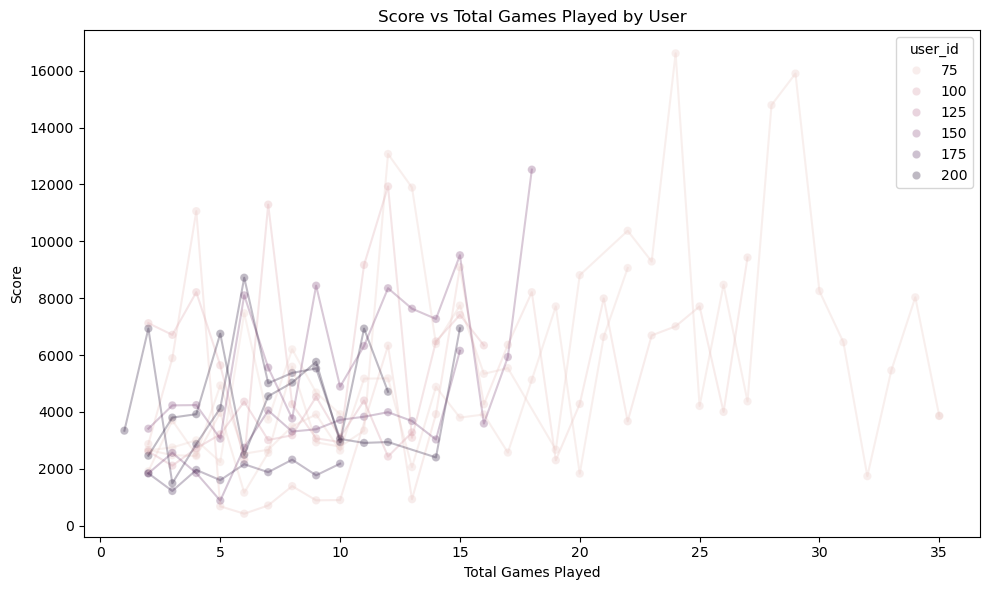

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))

sns.scatterplot(data=perf_psych_df, 
                x='total_whole_games_played', 
                y='score', 

                hue='user_id',
                alpha=0.31)
sns.lineplot(data=perf_psych_df, 
             x='total_whole_games_played', 
             y='score',
             hue='user_id',
             alpha=0.3,
             legend=False)

plt.title('Score vs Total Games Played by User')
plt.xlabel('Total Games Played')
plt.ylabel('Score')


plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

<Axes: xlabel='total_whole_games_played_log', ylabel='score_log'>

Text(0.5, 1.0, 'Log(score) vs Total Games Played by User')

Text(0.5, 0, 'Total Games Played')

Text(0, 0.5, 'Log(score)')

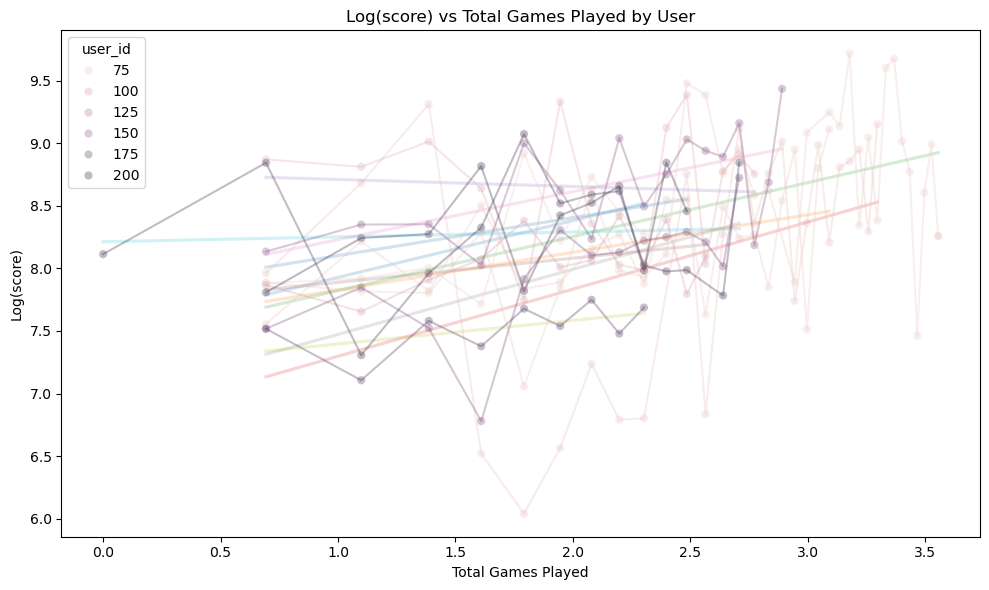

In [132]:

plt.figure(figsize=(10,6))

sns.scatterplot(data=perf_psych_df, 
                x='total_whole_games_played_log', 
                y='score_log', 
                hue='user_id',
                alpha=0.31)
for user_id in perf_psych_df['user_id'].unique():
    user_data = perf_psych_df[perf_psych_df['user_id'] == user_id]
    sns.regplot(data=user_data,
                x='total_whole_games_played_log',
                y='score_log',
                scatter=False,
                color=None,
                line_kws={'alpha': 0.2},
                ci=None)
sns.lineplot(data=perf_psych_df, 
             x='total_whole_games_played_log', 
             y='score_log',

             hue='user_id',
             alpha=0.3,
             legend=False)

plt.title('Log(score) vs Total Games Played by User')
plt.xlabel('Total Games Played')
plt.ylabel('Log(score)')


plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total_whole_games_played', ylabel='FLOW'>

<Axes: xlabel='total_whole_games_played', ylabel='FLOW'>

Text(0.5, 1.0, 'Flow vs Total Games Played by User')

Text(0.5, 0, 'Total Games Played')

Text(0, 0.5, 'Flow')

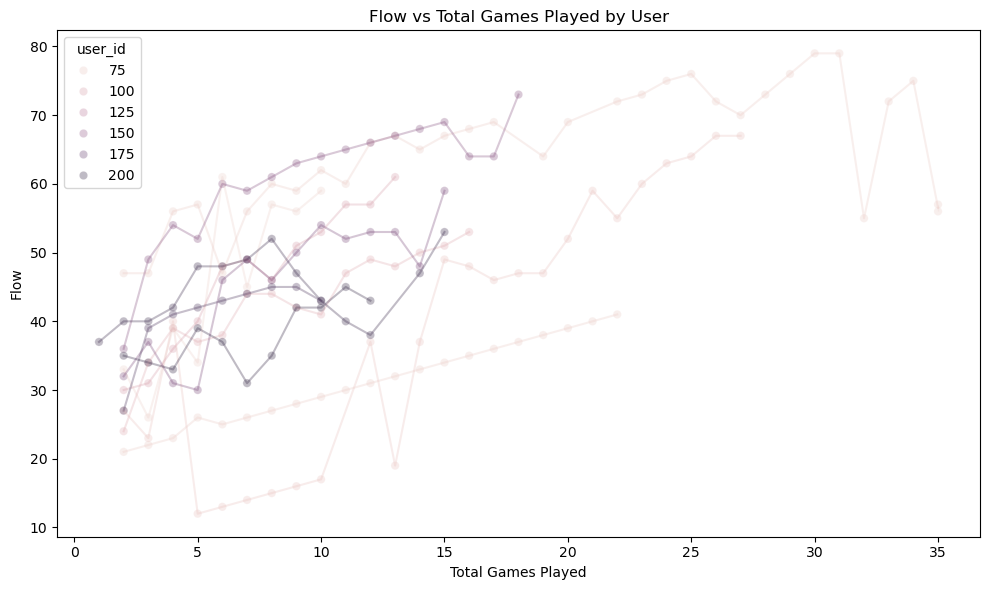

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=perf_psych_df, 
                x='total_whole_games_played', 
                y='FLOW', 
                hue='user_id',
                alpha=0.3)
sns.lineplot(data=perf_psych_df, 
             x='total_whole_games_played', 
             y='FLOW', 
             hue='user_id',
             alpha=0.3,
             legend=False)

plt.title('Flow vs Total Games Played by User')
plt.xlabel('Total Games Played')
plt.ylabel('Flow')
plt.tight_layout()
plt.show()


In [144]:
from scipy import stats

# Calculate correlation and p-value
corr, p_value = stats.pearsonr(perf_psych_df['score'], perf_psych_df['FLOW'])

# Print results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value}")
print(f"R-squared: {corr**2:.3f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(perf_psych_df['score'], perf_psych_df['FLOW'])
print(f"\nLinear regression results:")
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err:.3f}")

Pearson correlation coefficient: 0.557
P-value: 4.548928384590252e-16
R-squared: 0.310

Linear regression results:
Slope: 0.003
Intercept: 33.452
R-squared: 0.310
P-value: 4.548928384590165e-16
Standard error: 0.000


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='score', ylabel='FLOW'>

Text(0.5, 1.0, 'Flow vs Score')

Text(0.5, 0, 'score')

Text(0, 0.5, 'Flow')

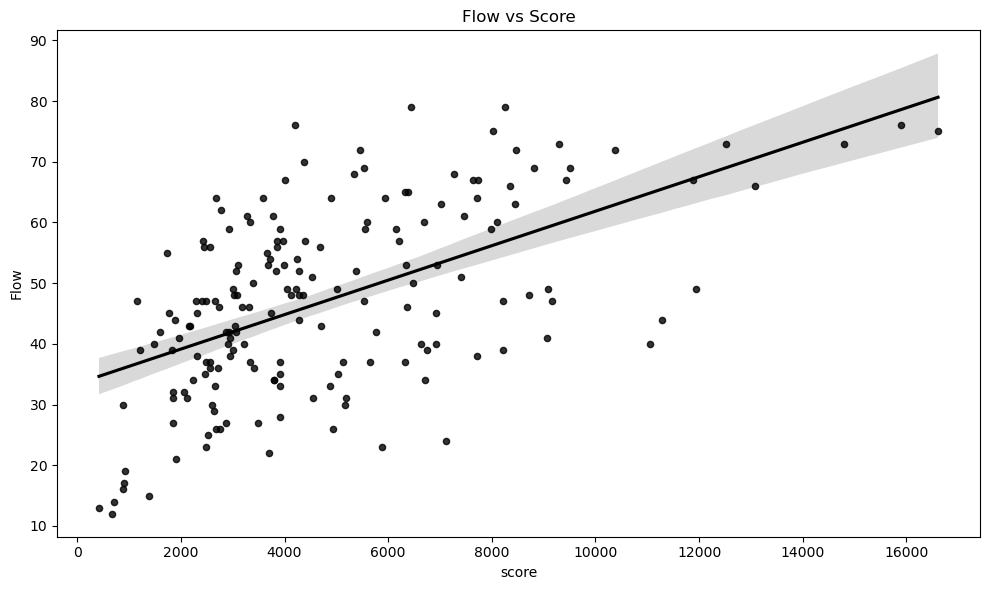

In [152]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(data=perf_psych_df, 
#                 x='score', 
#                 y='FLOW', 
#                 hue='user_id',
#                 alpha=0.3)

sns.regplot(data=perf_psych_df,
            x='score',
            y='FLOW',
            scatter=True,
            color='black',
            ci=95,
            label='Regression Line',
            scatter_kws={'s': 20},
            line_kws={'label': f'R² = {perf_psych_df[["score", "FLOW"]].corr().iloc[0,1]**2:.3f}'})


plt.title('Flow vs Score')
plt.xlabel('score')
plt.ylabel('Flow')
plt.tight_layout()
plt.show()


In [159]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLM

# Assuming we have perf_psych_df from the previous code
# We'll create a mixed linear model with:
# - Fixed effect: total_games_played (to capture learning/experience)
# - Random effect: user_id (to account for individual differences)
# - Dependent variable: score
# - Additional fixed effect: FLOW (to see its relationship with performance)

# First ensure user_id is treated as categorical
perf_psych_df['user_id'] = perf_psych_df['user_id'].astype('category')

# Fit the mixed linear model
model = MixedLM(
    endog=perf_psych_df['score'],
    exog=sm.add_constant(perf_psych_df[['total_games_played', 'FLOW']]),
    groups=perf_psych_df['user_id']
)

result = model.fit()

# Print the results
print(result.summary())
result

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     score       
No. Observations:     180         Method:                 REML        
No. Groups:           11          Scale:                  5124164.0961
Min. group size:      9           Log-Likelihood:         -1638.7684  
Max. group size:      33          Converged:              Yes         
Mean group size:      16.4                                            
----------------------------------------------------------------------
                      Coef.    Std.Err.   z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                -1460.171  895.210 -1.631 0.103 -3214.751 294.409
total_games_played      13.808   16.988  0.813 0.416   -19.488  47.104
FLOW                   126.713   20.620  6.145 0.000    86.298 167.128
Group Var          1267698.786  362.448                               

